## The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.
- Which variables are significant in predicting the price of a house
- How well those variables describe the price of a house.

In [83]:
# IMPORT LIBRARIES 
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import GridSearchCV

In [84]:
# TO DISPLAY ALL DATA IN ROWS & COLUMNS
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
# READ INPUT FILES FOR DATA
house_data=pd.read_csv('train.csv',encoding='UTF-8')
house_data.shape

(1460, 81)

In [85]:
house_data.head(3)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500


In [86]:
# TO GET NA VALUE % FOR EACH COLUMN
round((house_data.isnull().sum(axis=0)/(house_data.shape[0]))*100,2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
Street            0.00
Alley            93.77
LotShape          0.00
LandContour       0.00
Utilities         0.00
LotConfig         0.00
LandSlope         0.00
Neighborhood      0.00
Condition1        0.00
Condition2        0.00
BldgType          0.00
HouseStyle        0.00
OverallQual       0.00
OverallCond       0.00
YearBuilt         0.00
YearRemodAdd      0.00
RoofStyle         0.00
RoofMatl          0.00
Exterior1st       0.00
Exterior2nd       0.00
MasVnrType        0.55
MasVnrArea        0.55
ExterQual         0.00
ExterCond         0.00
Foundation        0.00
BsmtQual          2.53
BsmtCond          2.53
BsmtExposure      2.60
BsmtFinType1      2.53
BsmtFinSF1        0.00
BsmtFinType2      2.60
BsmtFinSF2        0.00
BsmtUnfSF         0.00
TotalBsmtSF       0.00
Heating           0.00
HeatingQC         0.00
CentralAir        0.00
Electrical        0.07
1stFlrSF   

# DATA CLEANING & UNDERSTANDING

Treating the missing values 

In [87]:
# LotFrontage --> Linear feet of street connected to property
# LotFrontage column contain 17% NA values & It is numerical value lets find its mean and median
# Mean and Median almost same so we can use Mean to relace NA values
print('Mean:{},Median:{}'.format(round(house_data['LotFrontage'].mean(),2),house_data['LotFrontage'].median()))
house_data['LotFrontage'].fillna(round(house_data['LotFrontage'].mean(),0),inplace=True)

Mean:70.05,Median:69.0


In [88]:
# Alley --> Type of alley access to property ;Grvl	Gravel, Pave	Paved,NA 	No alley access
# Here NA is valid not blank data it mean there is no access to Alley for that property need to replace NA with NO
house_data['Alley'].fillna('NO',inplace=True)
print(house_data['Alley'].unique())

['NO' 'Grvl' 'Pave']


In [89]:
# MasVnrType --> Masonry veneer type ; BrkCmn	Brick,BrkFace	Brick Face,CBlock	Cinder Block,None	None,Stone	Stone
# MasVnrType is catagorical variable let's replace nan with most repeated category
house_data['MasVnrType'].fillna(house_data['MasVnrType'].mode()[0],inplace=True)
house_data['MasVnrType'].unique()

array(['BrkFace', 'None', 'Stone', 'BrkCmn'], dtype=object)

In [90]:
# MasVnrArea --> Masonry veneer area in square feet
# MasVnrArea column contain 0.55% NA values & It is numerical value lets find its mean and median
# Mean and Median difference is too high so we can use Median to relace NA values
print('Mean:{},Median:{}'.format(round(house_data['MasVnrArea'].mean(),2),house_data['MasVnrArea'].median()))
house_data['MasVnrArea'].fillna(house_data['MasVnrArea'].mean(),inplace=True)

Mean:103.69,Median:0.0


In [91]:
# BsmtQual --> Evaluates the height of the basement ; Ex	Excellent (100+ i,Gd	Good (90-99 inches),
#TA	Typical (80-89 inches),Fa	Fair (70-79 inches),Po	Poor (<70 inches,NA	No Basement
# NA is No basement for the property let's replace NA with NO
house_data['BsmtQual'].fillna('NO',inplace=True)
house_data['BsmtQual'].unique()

array(['Gd', 'TA', 'Ex', 'NO', 'Fa'], dtype=object)

In [92]:
# BsmtCond --> Evaluates the general condition of the basement ; Ex	Ex,Gd	Good,TA	Typical - slight dampness allowed,
#Fa	Fair - dampness or some cracking or settling,Po	Poor - Severe cracking, settling, or wetness,NA	No Basement
# NA is No basement for the property let's replace NA with NO
house_data['BsmtCond'].fillna('NO',inplace=True)
house_data['BsmtCond'].unique()

array(['TA', 'Gd', 'NO', 'Fa', 'Po'], dtype=object)

In [93]:
# BsmtExposure --> Refers to walkout or garden level walls ; Gd	Good E,Av	Average Exposure 
#(split levels or foyers typically score average or above)	,Mn	Mimimum Exposure,No	No Exposure,NA	No Basement
# NA is No basement for the property let's replace NA with NO
house_data['BsmtExposure'].fillna('NO',inplace=True)
house_data['BsmtExposure']=house_data['BsmtExposure'].str.replace('No','NOE')
house_data['BsmtExposure'].unique()

array(['NOE', 'Gd', 'Mn', 'Av', 'NO'], dtype=object)

In [94]:
# BsmtFinType1 --> Rating of basement finished area ; GLQ	Good Living Q,ALQ	Average Living Quarters,
# BLQ	Below Average Living Quarters	,Rec	Average Rec Room,LwQ	Low Quality,Unf	Unfinshed,NA	No Basement
# NA is No basement for the property let's replace NA with NO
house_data['BsmtFinType1'].fillna('NO',inplace=True)
house_data['BsmtFinType1'].unique()

array(['GLQ', 'ALQ', 'Unf', 'Rec', 'BLQ', 'NO', 'LwQ'], dtype=object)

In [95]:
# BsmtFinType2 --> Rating of basement finished area (if multiple types) ; GLQ	Good Living Q,ALQ	Average Living Quarters,
#BLQ	Below Average Living Quarters	,Rec	Average Rec Room,LwQ	Low Quality,Unf	Unfinshed,NA	No Basement
# NA is No basement for the property let's replace NA with NO
house_data['BsmtFinType2'].fillna('NO',inplace=True)
house_data['BsmtFinType2'].unique()

array(['Unf', 'BLQ', 'NO', 'ALQ', 'Rec', 'LwQ', 'GLQ'], dtype=object)

In [96]:
# Electrical--> Electrical system ;SBrkr->Standard Circuit Breakers,FuseA	Fuse Box over 60 AMP and all Romex wiring,Mix->Mixed
#(Average)	,FuseF	60 AMP Fuse Box and mostly Romex wiring (Fair),FuseP	60 AMP Fuse Box and mostly knob &tube wiring (poor)
house_data['Electrical'].fillna(house_data['Electrical'].mode()[0],inplace=True)
house_data['Electrical'].unique()

array(['SBrkr', 'FuseF', 'FuseA', 'FuseP', 'Mix'], dtype=object)

In [97]:
# FireplaceQu-->Fireplace quality ;Ex	Excellent - Exceptional Masonry Fi,Gd	Good - Masonry Fireplace in main level,
# TA	Average - Prefabricated Fireplace in main living area or Masonry Fireplace in basement,
# Fa	Fair-Prefabricated Fireplace in basement,Po	Poor - Ben Franklin Stove,NA	No Fireplace
# NA is No Fireplace for the property let's replace NA with NO
house_data['FireplaceQu'].fillna('NO',inplace=True)
house_data['FireplaceQu'].unique()

array(['NO', 'TA', 'Gd', 'Fa', 'Ex', 'Po'], dtype=object)

In [98]:
# GarageType-->Garage location ; 2Types	More than one type of,Attchd	Attached to home,Basment->BasementGarage,NA	No Garage
# BuiltIn	Built-In (Garage part of house - typically has room above garage),CarPort	Car Port,Detchd	Detached from home
# NA is No Garage for the property let's replace NA with NO
house_data['GarageType'].fillna('NO',inplace=True)
house_data['GarageType'].unique()

array(['Attchd', 'Detchd', 'BuiltIn', 'CarPort', 'NO', 'Basment',
       '2Types'], dtype=object)

In [99]:
# GarageYrBlt--> Year garage was built
# Year Field lets replace with Median
house_data['GarageYrBlt'].fillna(house_data['GarageYrBlt'].median(),inplace=True)

In [100]:
# GarageFinish-->Interior finish of the garage ;  Fin	F,RFn	Rough Finished	,Unf	Unfinished,NA	No Garage
# NA is No Garage for the property let's replace NA with NO
house_data['GarageFinish'].fillna('NO',inplace=True)
house_data['GarageFinish'].unique()

array(['RFn', 'Unf', 'Fin', 'NO'], dtype=object)

In [101]:
# GarageQual--> Garage quality ;Ex	Ex,Gd	Good,TA	Typical/Average,Fa	Fair,Po	Poor,NA	No Garage
# NA is No Garage for the property let's replace NA with NO
house_data['GarageQual'].fillna('NO',inplace=True)
house_data['GarageQual'].unique()

array(['TA', 'Fa', 'Gd', 'NO', 'Ex', 'Po'], dtype=object)

In [102]:
# GarageCond-->Garage condition ; Ex	Ex,Gd	Good,TA	Typical/Average,Fa	Fair,Po	Poor,NA	No Garage
# NA is No Garage for the property let's replace NA with NO
house_data['GarageCond'].fillna('NO',inplace=True)
house_data['GarageCond'].unique()

array(['TA', 'Fa', 'NO', 'Gd', 'Po', 'Ex'], dtype=object)

In [103]:
# PoolQC-->Pool quality ; Ex	Ex,Gd	Good,TA	Average/Typical,Fa	Fair,NA	No Pool
# NA is No pool for the property let's replace NA with NO
house_data['PoolQC'].fillna('NO',inplace=True)
house_data['PoolQC'].unique()

array(['NO', 'Ex', 'Fa', 'Gd'], dtype=object)

In [104]:
# Fence-->Fence quality ;  GdPrv	Good ,MnPrv	Minimum Privacy,GdWo	Good Wood,MnWw	Minimum Wood/Wire,NA	No Fence
# NA is No fence for the property let's replace NA with NO
house_data['Fence'].fillna('NO',inplace=True)
house_data['Fence'].unique()

array(['NO', 'MnPrv', 'GdWo', 'GdPrv', 'MnWw'], dtype=object)

In [105]:
# MiscFeature-->Miscellaneous feature not covered in other categories ;Elev	E,Gar2	2nd Garage 
#(if not described in garage section),Othr	Other,Shed	Shed (over 100 SF),TenC	Tennis Court,NA	None
# NA is No feature for the property let's replace NA with NO
house_data['MiscFeature'].fillna('NO',inplace=True)
house_data['MiscFeature'].unique()

array(['NO', 'Shed', 'Gar2', 'Othr', 'TenC'], dtype=object)

In [106]:
round((house_data.isnull().sum(axis=0)/(house_data.shape[0]))*100,2)

Id               0.0
MSSubClass       0.0
MSZoning         0.0
LotFrontage      0.0
LotArea          0.0
Street           0.0
Alley            0.0
LotShape         0.0
LandContour      0.0
Utilities        0.0
LotConfig        0.0
LandSlope        0.0
Neighborhood     0.0
Condition1       0.0
Condition2       0.0
BldgType         0.0
HouseStyle       0.0
OverallQual      0.0
OverallCond      0.0
YearBuilt        0.0
YearRemodAdd     0.0
RoofStyle        0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
MasVnrType       0.0
MasVnrArea       0.0
ExterQual        0.0
ExterCond        0.0
Foundation       0.0
BsmtQual         0.0
BsmtCond         0.0
BsmtExposure     0.0
BsmtFinType1     0.0
BsmtFinSF1       0.0
BsmtFinType2     0.0
BsmtFinSF2       0.0
BsmtUnfSF        0.0
TotalBsmtSF      0.0
Heating          0.0
HeatingQC        0.0
CentralAir       0.0
Electrical       0.0
1stFlrSF         0.0
2ndFlrSF         0.0
LowQualFinSF     0.0
GrLivArea        0.0
BsmtFullBath 

# EDA

## Univariate Anysis

In [107]:
# Function to BOX plot for categorical variable
def boxplot_graph(xaxis,place):
    plt.subplot(10,3,place)
    plt.title(xaxis+' Vs '+'Price')
    sns.boxplot(x=xaxis,y='SalePrice',data=house_data)

In [108]:
# Function to scatter plot for numerical variable
def scatter_graph(xaxis,place):
    plt.subplot(4,3,place)
    plt.title(xaxis+' Vs '+'Price')
    sns.scatterplot(x=xaxis,y='SalePrice',data=house_data)

In [109]:
# Dropping ID column 
house_data.drop('Id',axis=1,inplace=True)

In [110]:
# Converting type to object for catergorical features
house_data['MSSubClass']=house_data['MSSubClass'].astype('object')
house_data['OverallQual']=house_data['OverallQual'].astype('object')
house_data['OverallCond']=house_data['OverallCond'].astype('object')
house_data['MasVnrType']=house_data['MasVnrType'].astype('object')
house_data['BsmtFullBath']=house_data['BsmtFullBath'].astype('object')
house_data['FullBath']=house_data['FullBath'].astype('object')
house_data['HalfBath']=house_data['HalfBath'].astype('object')
house_data['BedroomAbvGr']=house_data['BedroomAbvGr'].astype('object')
house_data['TotRmsAbvGrd']=house_data['TotRmsAbvGrd'].astype('object')
house_data['Fireplaces']=house_data['Fireplaces'].astype('object')
house_data['GarageCars']=house_data['GarageCars'].astype('object')
house_data['MoSold']=house_data['MoSold'].astype('object')

In [111]:
# YearBuilt, We can convert this column to Age of the property
house_data['YearBuilt']=2020-house_data['YearBuilt']    
# Binning Year to get more view from plot
bins = [5,10,20,30,40,50,60,70,80,100,150]
house_data['binned_age'] = pd.cut(house_data['YearBuilt'], bins)
# Convert to No.Of Years and Binning YearRemodAdd to get insight
house_data['YearRemodAdd']=2020-house_data['YearRemodAdd']  
bins = [5,10,20,30,40,50,60,70]
house_data['binned_Remodelage'] = pd.cut(house_data['YearRemodAdd'], bins)
# GarageYrBlt, We can convert this column to Age of the property
house_data['GarageYrBlt']=2020-house_data['GarageYrBlt']  
# YrSold, We can convert this column to Age of the property
house_data['YrSold']=2020-house_data['YrSold']  

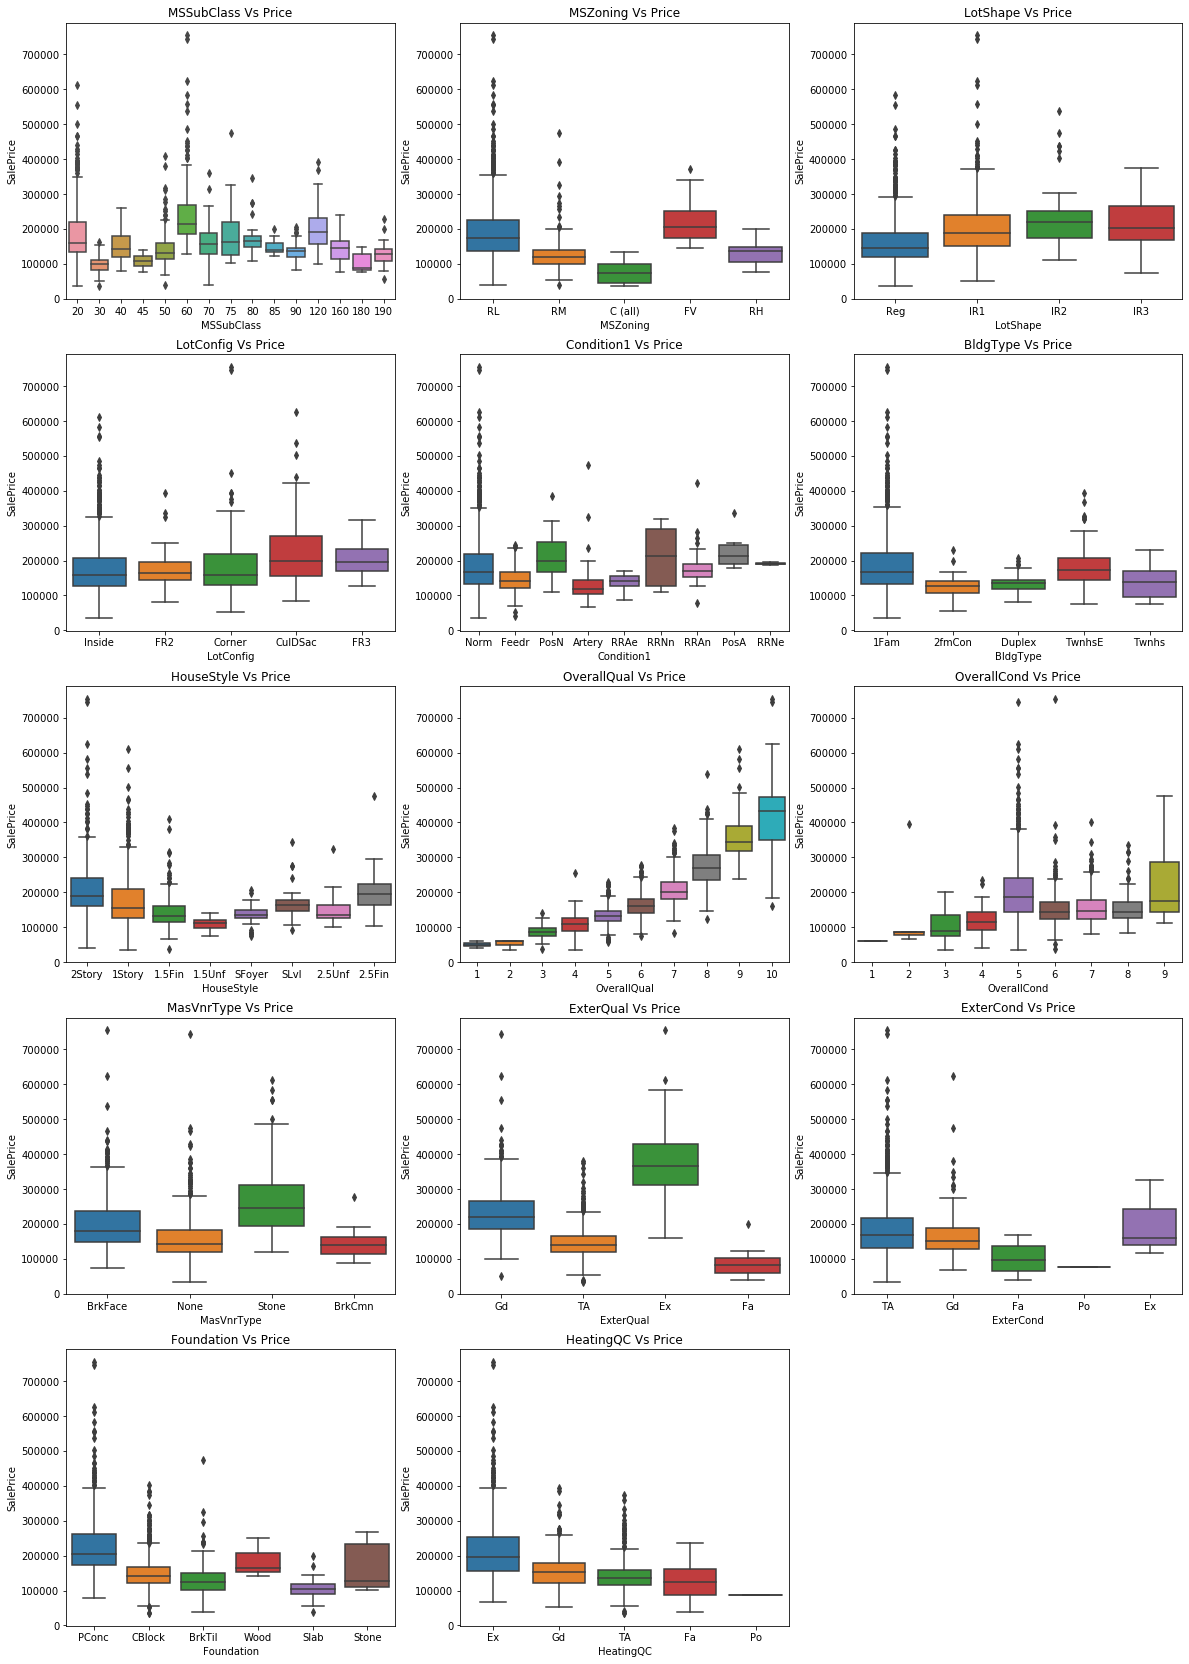

In [112]:
# Plottig catagorical features with price to get more insight on features
plt.figure(figsize=(20,60))                                      
MSSubClass_plot=boxplot_graph('MSSubClass',1)        
MSZoning_plot=boxplot_graph('MSZoning',2)
LotShape_plot=boxplot_graph('LotShape',3)
LotConfig_plot=boxplot_graph('LotConfig',4)
Condition1_plot=boxplot_graph('Condition1',5)
BldgType_plot=boxplot_graph('BldgType',6)
HouseStyle_plot=boxplot_graph('HouseStyle',7)
OverallQual_plot=boxplot_graph('OverallQual',8)
OverallCond_plot=boxplot_graph('OverallCond',9) 
MasVnrType_plot=boxplot_graph('MasVnrType',10)
ExterQual_plot=boxplot_graph('ExterQual',11)
ExterCond_plot=boxplot_graph('ExterCond',12)
Foundation_plot=boxplot_graph('Foundation',13)
HeatingQC_plot=boxplot_graph('HeatingQC',14)

Observations:
    - Feature like lotconfig not had any impact on price its median and values same across price.
    - Other than this all other features vary with price.

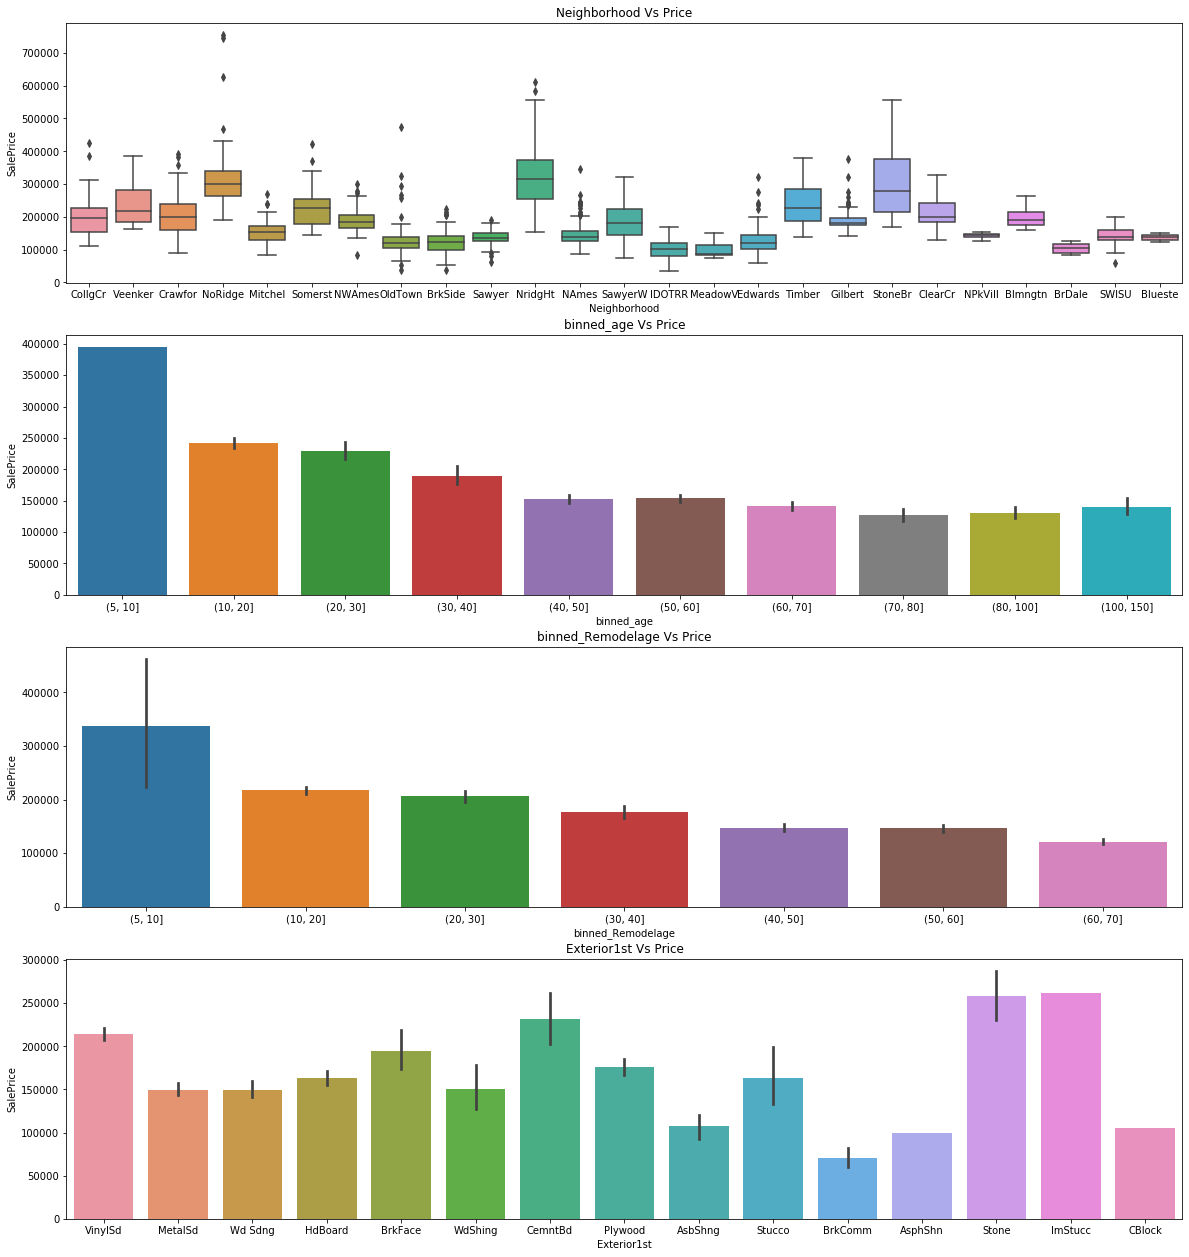

In [113]:
# Plottig catagorical features with price to get more insight on features
plt.figure(figsize=(20,22)) 
plt.subplot(4,1,1)
plt.title('Neighborhood'+' Vs '+'Price')
sns.boxplot(x='Neighborhood',y='SalePrice',data=house_data) 
plt.subplot(4,1,2)
plt.title('binned_age'+' Vs '+'Price')
sns.barplot(x='binned_age',y='SalePrice',data=house_data)
plt.subplot(4,1,3)
plt.title('binned_Remodelage'+' Vs '+'Price')
sns.barplot(x='binned_Remodelage',y='SalePrice',data=house_data)
plt.subplot(4,1,4)
plt.title('Exterior1st'+' Vs '+'Price')
sns.barplot(x='Exterior1st',y='SalePrice',data=house_data)

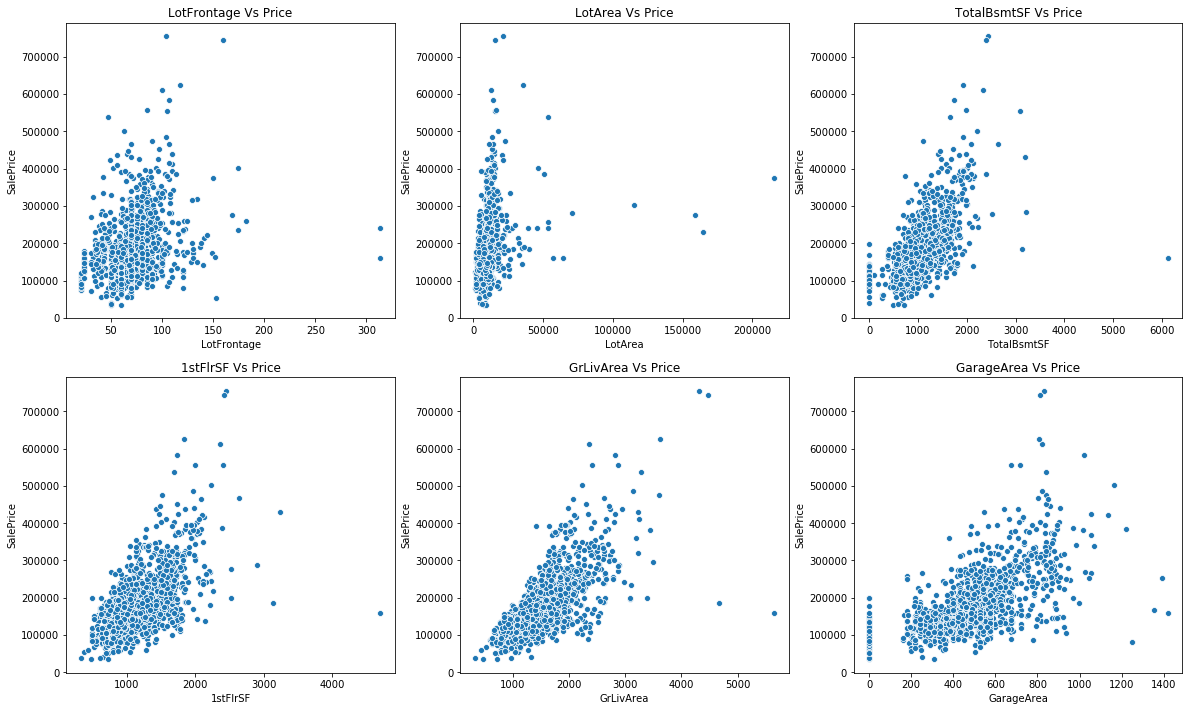

In [114]:
# plotting numeric features with price to observe its pattern.
plt.figure(figsize=(20,25))
LotFrontage_plot=scatter_graph('LotFrontage',1)
LotArea_plot=scatter_graph('LotArea',2)
TotalBsmtSF_plot=scatter_graph('TotalBsmtSF',3)
FlrSF_plot=scatter_graph('1stFlrSF',4)
GrLivArea_plot=scatter_graph('GrLivArea',5)
GarageArea_plot=scatter_graph('GarageArea',6)

Observations:
    - The plots are not exat liner they look exponential so we neeed to impliment advance regression.

### Dropping the columns which have single segment >90% example: Street column had 99% Pave

In [115]:
# We are printing count values to show skew features
print('Street')
print(round((house_data['Street'].value_counts()/house_data.shape[0])*100,2))
print('Alley')
print(round((house_data['Alley'].value_counts()/house_data.shape[0])*100,2))
print('LandContour')
print(round((house_data['LandContour'].value_counts()/house_data.shape[0])*100,2))
print('Utilities')
print(round((house_data['Utilities'].value_counts()/house_data.shape[0])*100,2))
print('LandSlope')
print(round((house_data['LandSlope'].value_counts()/house_data.shape[0])*100,2)) 
print('Condition2')
print(round((house_data['Condition2'].value_counts()/house_data.shape[0])*100,2))
print('RoofMatl')
print(round((house_data['RoofMatl'].value_counts()/house_data.shape[0])*100,2))
print('BsmtCond')
print(round((house_data['BsmtCond'].value_counts()/house_data.shape[0])*100,2))
print('BsmtFinType2')
print(round((house_data['BsmtFinType2'].value_counts()/house_data.shape[0])*100,2))
print('Heating')
print(round((house_data['Heating'].value_counts()/house_data.shape[0])*100,2))
print('CentralAir')
print(round((house_data['CentralAir'].value_counts()/house_data.shape[0])*100,2))
print('Electrical')
print(round((house_data['Electrical'].value_counts()/house_data.shape[0])*100,2))            
print('BsmtHalfBath')
print(round((house_data['BsmtHalfBath'].value_counts()/house_data.shape[0])*100,2)) 
print('KitchenAbvGr')
print(round((house_data['KitchenAbvGr'].value_counts()/house_data.shape[0])*100,2))
print('Functional')
print(round((house_data['Functional'].value_counts()/house_data.shape[0])*100,2))
print('GarageQual')
print(round((house_data['GarageQual'].value_counts()/house_data.shape[0])*100,2))
print('GarageCond')
print(round((house_data['GarageCond'].value_counts()/house_data.shape[0])*100,2))
print('PavedDrive')
print(round((house_data['PavedDrive'].value_counts()/house_data.shape[0])*100,2))
print('3SsnPorch')
print(round((house_data['3SsnPorch'].value_counts()/house_data.shape[0])*100,2))
print('ScreenPorch')
print(round((house_data['ScreenPorch'].value_counts()/house_data.shape[0])*100,2))
print('PoolArea')
print(round((house_data['PoolArea'].value_counts()/house_data.shape[0])*100,2))
print('PoolQC')
print(round((house_data['PoolQC'].value_counts()/house_data.shape[0])*100,2))
print('MiscFeature')
print(round((house_data['MiscFeature'].value_counts()/house_data.shape[0])*100,2))
print('MiscVal')
print(round((house_data['MiscVal'].value_counts()/house_data.shape[0])*100,2))

Street
Pave    99.59
Grvl     0.41
Name: Street, dtype: float64
Alley
NO      93.77
Grvl     3.42
Pave     2.81
Name: Alley, dtype: float64
LandContour
Lvl    89.79
Bnk     4.32
HLS     3.42
Low     2.47
Name: LandContour, dtype: float64
Utilities
AllPub    99.93
NoSeWa     0.07
Name: Utilities, dtype: float64
LandSlope
Gtl    94.66
Mod     4.45
Sev     0.89
Name: LandSlope, dtype: float64
Condition2
Norm      98.97
Feedr      0.41
RRNn       0.14
PosN       0.14
Artery     0.14
RRAe       0.07
PosA       0.07
RRAn       0.07
Name: Condition2, dtype: float64
RoofMatl
CompShg    98.22
Tar&Grv     0.75
WdShngl     0.41
WdShake     0.34
Roll        0.07
Metal       0.07
Membran     0.07
ClyTile     0.07
Name: RoofMatl, dtype: float64
BsmtCond
TA    89.79
Gd     4.45
Fa     3.08
NO     2.53
Po     0.14
Name: BsmtCond, dtype: float64
BsmtFinType2
Unf    86.03
Rec     3.70
LwQ     3.15
NO      2.60
BLQ     2.26
ALQ     1.30
GLQ     0.96
Name: BsmtFinType2, dtype: float64
Heating
GasA     97.

In [116]:
# Removing the skew features 
house_data.drop('Street',axis=1,inplace=True) 
house_data.drop('Alley',axis=1,inplace=True)
house_data.drop('LandContour',axis=1,inplace=True)
house_data.drop('Utilities',axis=1,inplace=True)
house_data.drop('LandSlope',axis=1,inplace=True)
house_data.drop('Condition2',axis=1,inplace=True)

#Droping binned_age it is created for graph purpose   
house_data.drop('binned_age',axis=1,inplace=True)
house_data.drop('binned_Remodelage',axis=1,inplace=True)

house_data.drop('RoofMatl',axis=1,inplace=True)
house_data.drop('BsmtCond',axis=1,inplace=True)
house_data.drop('BsmtFinType2',axis=1,inplace=True)
house_data.drop('Heating',axis=1,inplace=True)
house_data.drop('CentralAir',axis=1,inplace=True)
house_data.drop('Electrical',axis=1,inplace=True)
house_data.drop('BsmtHalfBath',axis=1,inplace=True)
house_data.drop('KitchenAbvGr',axis=1,inplace=True)
house_data.drop('Functional',axis=1,inplace=True)
house_data.drop('GarageQual',axis=1,inplace=True)
house_data.drop('GarageCond',axis=1,inplace=True)
house_data.drop('PavedDrive',axis=1,inplace=True)
house_data.drop('3SsnPorch',axis=1,inplace=True)
house_data.drop('ScreenPorch',axis=1,inplace=True)
house_data.drop('PoolArea',axis=1,inplace=True)
house_data.drop('PoolQC',axis=1,inplace=True)
house_data.drop('MiscFeature',axis=1,inplace=True)
house_data.drop('MiscVal',axis=1,inplace=True)
house_data.drop('LowQualFinSF',axis=1,inplace=True) 
house_data.drop('BsmtFinSF2',axis=1,inplace=True)

house_data.drop('Condition1',axis=1,inplace=True)
house_data.drop('SaleType',axis=1,inplace=True)

In [117]:
#print(round((house_data['SaleCondition'].value_counts()/house_data.shape[0])*100,2))

# Bivariate Anaysis

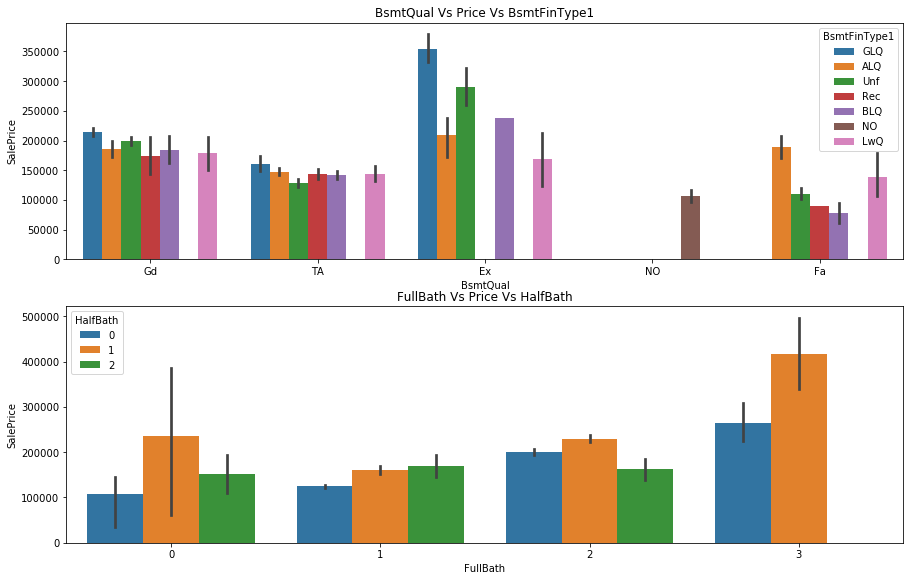

In [118]:
# plotting two features with price to observe how ther changes with respect to price
plt.figure(figsize=(15,20))
plt.subplot(4,1,1)
plt.title('BsmtQual'+' Vs '+'Price'+' Vs '+'BsmtFinType1')
sns.barplot(x='BsmtQual',y='SalePrice',hue='BsmtFinType1',data=house_data)
plt.subplot(4,1,2)
plt.title('FullBath'+' Vs '+'Price'+' Vs '+'HalfBath')
sns.barplot(x='FullBath',y='SalePrice',hue='HalfBath',data=house_data)

In [119]:
house_data.shape

(1460, 52)

# Target Variable Outlier Treatment

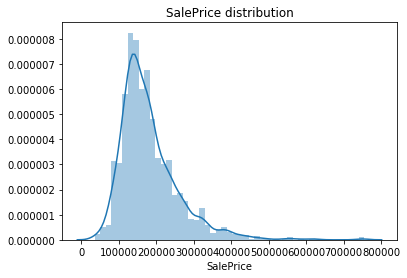

In [120]:
plt.title('SalePrice distribution')
sns.distplot(house_data['SalePrice'] )

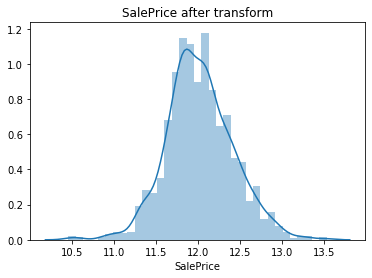

In [121]:
#SalePrice after transforming
house_data['SalePrice'] = np.log1p(house_data['SalePrice'])
plt.title('SalePrice after transform')
sns.distplot(house_data['SalePrice'])

### CORRELATION MATRIX 

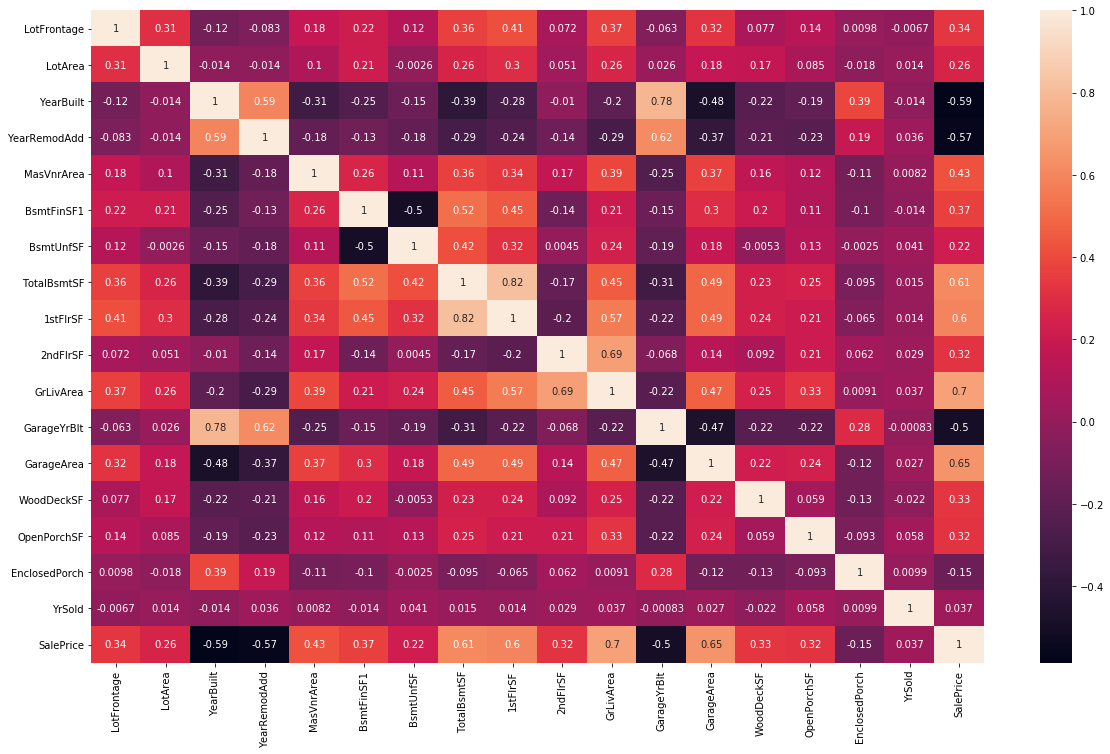

In [122]:
# Check the correlation of numerical columns
plt.figure(figsize = (20, 12))
sns.heatmap(house_data.corr(), annot = True)

In [123]:
# Dropping corelated variable because they are multicollinear
house_data.drop('1stFlrSF',axis=1,inplace=True)
house_data.drop('GarageYrBlt',axis=1,inplace=True)

In [124]:
house_data.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,YrSold,SaleCondition,SalePrice
0,60,RL,65.0,8450,Reg,Inside,CollgCr,1Fam,2Story,7,5,17,17,Gable,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,NOE,GLQ,706,150,856,Ex,854,1710,1,2,1,3,Gd,8,0,NO,Attchd,RFn,2,548,0,61,0,NO,2,12,Normal,12.247699
1,20,RL,80.0,9600,Reg,FR2,Veenker,1Fam,1Story,6,8,44,44,Gable,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,Gd,ALQ,978,284,1262,Ex,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,0,NO,5,13,Normal,12.109016
2,60,RL,68.0,11250,IR1,Inside,CollgCr,1Fam,2Story,7,5,19,18,Gable,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,Mn,GLQ,486,434,920,Ex,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0,NO,9,12,Normal,12.317171
3,70,RL,60.0,9550,IR1,Corner,Crawfor,1Fam,2Story,7,5,105,50,Gable,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,NOE,ALQ,216,540,756,Gd,756,1717,1,1,0,3,Gd,7,1,Gd,Detchd,Unf,3,642,0,35,272,NO,2,14,Abnorml,11.849405
4,60,RL,84.0,14260,IR1,FR2,NoRidge,1Fam,2Story,8,5,20,20,Gable,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,Av,GLQ,655,490,1145,Ex,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,0,NO,12,12,Normal,12.429220


In [125]:
house_data.shape

(1460, 50)

## Dummy Variables

In [126]:
# To get the list of features having object as type
a=list(house_data.select_dtypes(['object']).columns)
print(len(a))
print(a)
print((house_data['Exterior1st'].value_counts()/house_data.shape[0])*100)

34
['MSSubClass', 'MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtExposure', 'BsmtFinType1', 'HeatingQC', 'BsmtFullBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageCars', 'Fence', 'MoSold', 'SaleCondition']
VinylSd    35.273973
HdBoard    15.205479
MetalSd    15.068493
Wd Sdng    14.109589
Plywood     7.397260
CemntBd     4.178082
BrkFace     3.424658
WdShing     1.780822
Stucco      1.712329
AsbShng     1.369863
Stone       0.136986
BrkComm     0.136986
AsphShn     0.068493
CBlock      0.068493
ImStucc     0.068493
Name: Exterior1st, dtype: float64


In [127]:
# creating dummy variable for catagorical variable having more than 2 values
house_data=pd.get_dummies(house_data,
columns=['MSSubClass','MSZoning','LotShape','LotConfig','Neighborhood','BldgType','HouseStyle','OverallQual',
         'OverallCond','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
         'BsmtExposure','BsmtFinType1','HeatingQC','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual',
         'TotRmsAbvGrd','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageCars','Fence','MoSold',
         'SaleCondition']
,prefix=['MSSubClass','MSZoning','LotShape','LotConfig','Neighborhood','BldgType','HouseStyle','OverallQual',
        'OverallCond','RoofStyle','Exterior1st','Exterior2nd','MasVnrType','ExterQual','ExterCond','Foundation','BsmtQual',
        'BsmtExposure','BsmtFinType1','HeatingQC','BsmtFullBath','FullBath','HalfBath','BedroomAbvGr','KitchenQual',
        'TotRmsAbvGrd','Fireplaces','FireplaceQu','GarageType','GarageFinish','GarageCars','Fence','MoSold',
         'SaleCondition'])

In [128]:
# Dropping 1 dummie varibale which had least % of values
house_data.drop(['MSSubClass_40','MSZoning_C (all)','LotShape_IR3','LotConfig_FR3','Neighborhood_Blueste',
                 'BldgType_2fmCon','HouseStyle_2.5Fin','OverallQual_1','OverallCond_1','RoofStyle_Shed','Exterior1st_AsphShn',
                 'Exterior2nd_CBlock','MasVnrType_BrkCmn','ExterQual_Fa','ExterCond_Po','Foundation_Wood','BsmtQual_Fa',
                 'BsmtExposure_NO','BsmtFinType1_NO','HeatingQC_Po','BsmtFullBath_3','FullBath_0','HalfBath_2',
                 'BedroomAbvGr_8','KitchenQual_Fa','TotRmsAbvGrd_2','Fireplaces_3','FireplaceQu_Po','GarageType_2Types',
                 'GarageFinish_NO','GarageCars_4','Fence_MnWw','MoSold_2','SaleCondition_AdjLand']
                 ,axis=1,inplace=True)


In [129]:
house_data.head(2)

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,YrSold,SalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_NO,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NOE,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,BsmtFullBath_0,BsmtFullBath_1,BsmtFullBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_0,HalfBath_1,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_0,Fireplaces_1,Fireplaces_2,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NO,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NO,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_NO,MoSold_1,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,65.0,8450,17,17,196.0,706,150,856,854,1710,548,0,61,0,12,12.247699,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0

In [130]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Columns: 230 entries, LotFrontage to SaleCondition_Partial
dtypes: float64(3), int64(13), uint8(214)
memory usage: 487.7 KB


# Train Test Split

In [131]:
# Spliting the data to train and test data 
house_data_train,house_data_test=train_test_split(house_data,train_size=0.7,test_size=0.3,random_state=100)
print('data_shape ',house_data.shape)
print('train_shape',house_data_train.shape)
print('test_shape ',house_data_test.shape)

data_shape  (1460, 230)
train_shape (1021, 230)
test_shape  (438, 230)


## Scalling Train Data

In [132]:
house_data_train.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,YrSold,SalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_NO,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NOE,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,BsmtFullBath_0,BsmtFullBath_1,BsmtFullBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_0,HalfBath_1,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_0,Fireplaces_1,Fireplaces_2,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NO,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NO,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_NO,MoSold_1,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.00000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000

In [133]:
import warnings
warnings.filterwarnings('ignore')
scaler=MinMaxScaler()

numeric_list=['LotFrontage','LotArea','YearBuilt','YearRemodAdd','MasVnrArea','BsmtFinSF1','BsmtUnfSF','TotalBsmtSF',
              '2ndFlrSF','GrLivArea','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch',
              'YrSold','SalePrice']
house_data_train[numeric_list]=scaler.fit_transform(house_data_train[numeric_list])
house_data_test[numeric_list]=scaler.transform(house_data_test[numeric_list])

In [134]:
house_data_train.describe()

,LotFrontage,LotArea,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtUnfSF,TotalBsmtSF,2ndFlrSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,YrSold,SalePrice,MSSubClass_20,MSSubClass_30,MSSubClass_45,MSSubClass_50,MSSubClass_60,MSSubClass_70,MSSubClass_75,MSSubClass_80,MSSubClass_85,MSSubClass_90,MSSubClass_120,MSSubClass_160,MSSubClass_180,MSSubClass_190,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR1,LotShape_IR2,LotShape_Reg,LotConfig_Corner,LotConfig_CulDSac,LotConfig_FR2,LotConfig_Inside,Neighborhood_Blmngtn,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,BldgType_1Fam,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Fin,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,RoofStyle_Flat,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,ExterQual_Ex,ExterQual_Gd,ExterQual_TA,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,Foundation_BrkTil,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,BsmtQual_Ex,BsmtQual_Gd,BsmtQual_NO,BsmtQual_TA,BsmtExposure_Av,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_NOE,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,HeatingQC_Ex,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_TA,BsmtFullBath_0,BsmtFullBath_1,BsmtFullBath_2,FullBath_1,FullBath_2,FullBath_3,HalfBath_0,HalfBath_1,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,KitchenQual_Ex,KitchenQual_Gd,KitchenQual_TA,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_0,Fireplaces_1,Fireplaces_2,FireplaceQu_Ex,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_NO,FireplaceQu_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_NO,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageCars_0,GarageCars_1,GarageCars_2,GarageCars_3,Fence_GdPrv,Fence_GdWo,Fence_MnPrv,Fence_NO,MoSold_1,MoSold_3,MoSold_4,MoSold_5,MoSold_6,MoSold_7,MoSold_8,MoSold_9,MoSold_10,MoSold_11,MoSold_12,SaleCondition_Abnorml,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.000000,1021.00000

# Model Building

In [135]:
# Assign SalePrice to y variable and all other variable to x variable
y_train=house_data_train.pop('SalePrice')
y_test=house_data_test.pop('SalePrice')
x_train=house_data_train
x_test=house_data_test
print(x_train.shape,x_test.shape)

(1021, 229) (438, 229)


### RFE To get top features

In [136]:
# Using sklearn RFE to get top 12 features
lr = LinearRegression()
lr.fit(x_train, y_train)
rfe = RFE(lr,82)
rfe = rfe.fit(x_train, y_train)

In [137]:
# Columns we get after RFE applied
rfe_columns = x_train.columns[rfe.support_]
rfe_columns

Index(['MSSubClass_90', 'MSSubClass_190', 'BldgType_1Fam', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'OverallQual_2', 'OverallQual_3',
       'OverallQual_4', 'OverallQual_5', 'OverallQual_6', 'OverallQual_7',
       'OverallQual_8', 'OverallQual_9', 'OverallQual_10', 'OverallCond_2',
       'OverallCond_3', 'OverallCond_4', 'OverallCond_5', 'OverallCond_6',
       'OverallCond_7', 'OverallCond_8', 'OverallCond_9',
       'Exterior1st_AsbShng', 'Exterior1st_BrkComm', 'Exterior1st_BrkFace',
       'Exterior1st_CBlock', 'Exterior1st_CemntBd', 'Exterior1st_HdBoard',
       'Exterior1st_ImStucc', 'Exterior1st_MetalSd', 'Exterior1st_Plywood',
       'Exterior1st_Stone', 'Exterior1st_Stucco', 'Exterior1st_VinylSd',
       'Exterior1st_Wd Sdng', 'Exterior1st_WdShing', 'Exterior2nd_AsbShng',
       'Exterior2nd_AsphShn', 'Exterior2nd_Brk Cmn', 'Exterior2nd_CmentBd',
       'Exterior2nd_Other', 'Exterior2nd_Stucco', 'Exterior2nd_VinylSd',
       'Exterior2nd_Wd Sdng', 'Exte

In [138]:
# prepare a dataframe for the features suggested by RFE
x_train_rfe=x_train[rfe_columns]
x_test_rfe=x_test[rfe_columns]
print(x_train_rfe.shape)
x_train_rfe.head(5)

(1021, 82)


,MSSubClass_90,MSSubClass_190,BldgType_1Fam,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,OverallQual_2,OverallQual_3,OverallQual_4,OverallQual_5,OverallQual_6,OverallQual_7,OverallQual_8,OverallQual_9,OverallQual_10,OverallCond_2,OverallCond_3,OverallCond_4,OverallCond_5,OverallCond_6,OverallCond_7,OverallCond_8,OverallCond_9,Exterior1st_AsbShng,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsbShng,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_CmentBd,Exterior2nd_Other,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,ExterCond_Ex,ExterCond_Fa,ExterCond_Gd,ExterCond_TA,BsmtQual_NO,BsmtFinType1_ALQ,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_Rec,BsmtFinType1_Unf,BedroomAbvGr_0,BedroomAbvGr_1,BedroomAbvGr_2,BedroomAbvGr_3,BedroomAbvGr_4,BedroomAbvGr_5,BedroomAbvGr_6,TotRmsAbvGrd_3,TotRmsAbvGrd_4,TotRmsAbvGrd_5,TotRmsAbvGrd_6,TotRmsAbvGrd_7,TotRmsAbvGrd_8,TotRmsAbvGrd_9,TotRmsAbvGrd_10,TotRmsAbvGrd_11,TotRmsAbvGrd_12,TotRmsAbvGrd_14,Fireplaces_0,FireplaceQu_NO,GarageType_NO,GarageFinish_Fin,GarageFinish_RFn,GarageFinish_Unf,GarageCars_0
210,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,1,0,0,0,1
318,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0
239,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0
986,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0
1416,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0


# Ridge Model Building 

In [139]:
# list pf alphas

params = {'alpha': [0.00000001,0.00000002, 0.00000003,0.00000004,0.00000005,0.00000006,0.00000007,0.00000008,0.00000009,0.0000001,
                    0.01, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 
                    9.0, 10.0, 20, 50, 100, 500, 1000 ]}
ridge = Ridge()
# cross validation
folds = 5
ridge_model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
ridge_model_cv.fit(x_train_rfe, y_train)

Fitting 5 folds for each of 35 candidates, totalling 175 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 175 out of 175 | elapsed:    1.9s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-08, 2e-08, 3e-08, 4e-08, 5e-08, 6e-08,
                                   7e-08, 8e-08, 9e-08, 1e-07, 0.01, 0.1, 0.2,
                                   0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0,
                                   3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [140]:
# display the mean scores from GRID Scarch
ridge_cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
ridge_cv_results = ridge_cv_results[ridge_cv_results['param_alpha']<=500]
ridge_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by = ['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
18,0.8,-0.039675,-0.043305,1
17,0.7,-0.039630,-0.043305,2
19,0.9,-0.039717,-0.043311,3
20,1,-0.039757,-0.043317,4
16,0.6,-0.039581,-0.043336,5
15,0.5,-0.039531,-0.043372,6
14,0.4,-0.039481,-0.043413,7
13,0.3,-0.039430,-0.043462,8
21,2,-0.040084,-0.043472,9
12,0.2,-0.039370,-0.043520,10


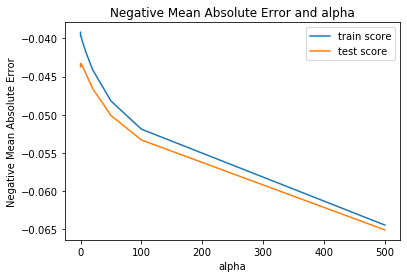

In [141]:
# plotting mean test and train scoes with alpha 
ridge_cv_results['param_alpha'] = ridge_cv_results['param_alpha'].astype('int32')
# plotting
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_train_score'])
plt.plot(ridge_cv_results['param_alpha'], ridge_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
#plt.xscale('log')
plt.show()

In [142]:
# Best alpha value
ridge_model_cv.best_estimator_

Ridge(alpha=0.8)

In [143]:
# check the coefficient values with lambda = 0.8
alpha = 0.8
ridge = Ridge(alpha=alpha)
ridge.fit(x_train_rfe, y_train)
ridge.coef_

array([ 0.0044166 ,  0.00217801,  0.01629156,  0.0044166 , -0.02021739,
       -0.00266879, -0.17396889, -0.07404628, -0.06241562, -0.0345162 ,
       -0.0122898 ,  0.04491847,  0.10378629,  0.17568048,  0.17528716,
       -0.00092532, -0.04000696, -0.002378  ,  0.02393441,  0.02741722,
        0.03970991,  0.03525749,  0.05942685, -0.02082424, -0.0028758 ,
        0.03285191, -0.05270691,  0.01673963, -0.00806241,  0.00833549,
       -0.00515842,  0.02007233,  0.00801825, -0.01283522,  0.02661823,
        0.004503  ,  0.00121851, -0.0269471 , -0.01589434, -0.02145624,
       -0.01646801,  0.        , -0.0249682 , -0.01834956, -0.02425061,
       -0.04138765,  0.02366993, -0.02789647, -0.00082252,  0.00504906,
       -0.04514363,  0.02113997,  0.00932186,  0.03744086, -0.00106207,
       -0.00422904, -0.01746796,  0.0252842 , -0.0213942 , -0.01984853,
       -0.02007342, -0.00061395, -0.02968644, -0.00064558, -0.08079012,
       -0.06646942, -0.04011237, -0.02266832, -0.00233599,  0.00

In [144]:
# Check the mean squared error
print(mean_squared_error(y_test, ridge.predict(x_test_rfe)))
print(r2_score(y_train, ridge.predict(x_train_rfe)))
print(r2_score(y_test, ridge.predict(x_test_rfe)))

0.0040406121418780075
0.8285105367673886
0.7679153488578395


In [145]:
# Write the Features and coefficienst in a dataframe
ridge_df = pd.DataFrame({'Features':x_train_rfe.columns, 'Coeff':ridge.coef_})
ridge_df.reset_index(drop=True, inplace=True)
ridge_df

,Features,Coeff
0,MSSubClass_90,0.004417
1,MSSubClass_190,0.002178
2,BldgType_1Fam,0.016292
3,BldgType_Duplex,0.004417
4,BldgType_Twnhs,-0.020217
5,BldgType_TwnhsE,-0.002669
6,OverallQual_2,-0.173969
7,OverallQual_3,-0.074046
8,OverallQual_4,-0.062416
9,OverallQual_5,-0.034516


In [146]:
ridge_coeff_dict = dict(pd.Series(ridge.coef_, index = x_train_rfe.columns))
ridge_coeff_dict

{'MSSubClass_90': 0.004416601431030994,
 'MSSubClass_190': 0.0021780132692673327,
 'BldgType_1Fam': 0.016291564627943192,
 'BldgType_Duplex': 0.004416601431030981,
 'BldgType_Twnhs': -0.02021738782725034,
 'BldgType_TwnhsE': -0.002668791501003963,
 'OverallQual_2': -0.17396888750936532,
 'OverallQual_3': -0.07404628230624719,
 'OverallQual_4': -0.06241561518581563,
 'OverallQual_5': -0.03451619720675025,
 'OverallQual_6': -0.012289804413209914,
 'OverallQual_7': 0.04491846917172572,
 'OverallQual_8': 0.10378629060821817,
 'OverallQual_9': 0.17568048127999988,
 'OverallQual_10': 0.17528716217793291,
 'OverallCond_2': -0.0009253190924215158,
 'OverallCond_3': -0.04000696101189559,
 'OverallCond_4': -0.002377995032931715,
 'OverallCond_5': 0.02393441394092004,
 'OverallCond_6': 0.027417223963047983,
 'OverallCond_7': 0.03970991302271716,
 'OverallCond_8': 0.035257490208260425,
 'OverallCond_9': 0.05942685061882034,
 'Exterior1st_AsbShng': -0.020824238864162962,
 'Exterior1st_BrkComm': -0.

# RFE To reduce features 

In [147]:
# Do an RFE to minimise the features to 15 from 50
x_train_ridge = x_train_rfe[ridge_df['Features']]
lm = LinearRegression()
lm.fit(x_train_ridge, y_train)
rfe = RFE(lm, 24)            
rfe = rfe.fit(x_train_ridge, y_train)

In [148]:
# Columns we get after RFE applied
ridge_rfe_columns = x_train_rfe.columns[rfe.support_]
ridge_rfe_columns

Index(['MSSubClass_190', 'BldgType_1Fam', 'BldgType_Duplex', 'BldgType_Twnhs',
       'BldgType_TwnhsE', 'Exterior1st_BrkFace', 'Exterior1st_CemntBd',
       'Exterior1st_HdBoard', 'Exterior1st_ImStucc', 'Exterior1st_MetalSd',
       'Exterior1st_Plywood', 'Exterior1st_Stone', 'Exterior1st_Stucco',
       'Exterior1st_VinylSd', 'Exterior1st_Wd Sdng', 'Exterior1st_WdShing',
       'Exterior2nd_AsphShn', 'BsmtQual_NO', 'BsmtFinType1_ALQ',
       'BsmtFinType1_BLQ', 'BsmtFinType1_GLQ', 'BsmtFinType1_LwQ',
       'BsmtFinType1_Rec', 'BsmtFinType1_Unf'],
      dtype='object')

In [149]:
def coeff_map(x):
    return ridge_coeff_dict[x]
r_df = pd.DataFrame(list(zip( x_train_ridge.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
r_df = r_df.loc[r_df['rfe_support'] == True]
r_df.reset_index(drop=True, inplace=True)
r_df['Coefficient'] = r_df['Features'].apply(coeff_map)
r_df = r_df.sort_values(by=['Coefficient'], ascending=False)
r_df=r_df.head(10)
r_df

,Features,rfe_support,rfe_ranking,Coefficient
20,BsmtFinType1_GLQ,True,1,0.037441
5,Exterior1st_BrkFace,True,1,0.032852
13,Exterior1st_VinylSd,True,1,0.026618
18,BsmtFinType1_ALQ,True,1,0.021140
10,Exterior1st_Plywood,True,1,0.020072
6,Exterior1st_CemntBd,True,1,0.016740
1,BldgType_1Fam,True,1,0.016292
19,BsmtFinType1_BLQ,True,1,0.009322
8,Exterior1st_ImStucc,True,1,0.008335
11,Exterior1st_Stone,True,1,0.008018


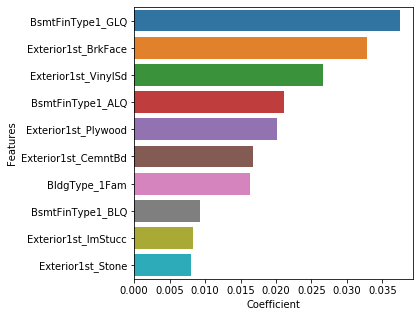

In [150]:
# bar plot to determine the variables that would affect pricing most using ridge regression
plt.figure(figsize=(5,5))
sns.barplot(y ='Features', x='Coefficient', data =r_df)
plt.show()

# Lasso Model Building

In [151]:
lasso = Lasso()
params = {'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005, 0.001, 0.002, 0.003, 0.004, 0.005, 0.01]}
folds = 5
lasso_model_cv = GridSearchCV(estimator = lasso,                         
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

lasso_model_cv.fit(x_train_rfe, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  55 out of  55 | elapsed:    0.7s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.001, 0.002, 0.003, 0.004, 0.005, 0.01]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [152]:
# display the mean scores
lasso_cv_results = pd.DataFrame(lasso_model_cv.cv_results_)
lasso_cv_results[['param_alpha', 'mean_train_score', 'mean_test_score', 'rank_test_score']].sort_values(by =['rank_test_score'])

,param_alpha,mean_train_score,mean_test_score,rank_test_score
1,0.0002,-0.040185,-0.043231,1
0,0.0001,-0.039802,-0.043278,2
2,0.0003,-0.040536,-0.043369,3
3,0.0004,-0.040982,-0.043666,4
4,0.0005,-0.041518,-0.044080,5
5,0.001,-0.044668,-0.046914,6
6,0.002,-0.050317,-0.052217,7
7,0.003,-0.054655,-0.056508,8
8,0.004,-0.057723,-0.059097,9
9,0.005,-0.060376,-0.061338,10


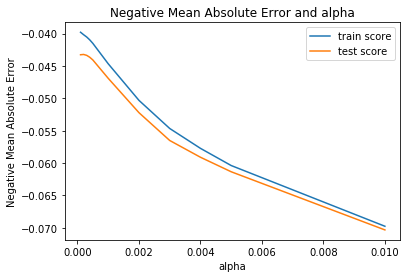

In [153]:
# plotting mean test and train scoes with alpha 
lasso_cv_results['param_alpha'] = lasso_cv_results['param_alpha'].astype('float64')
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_train_score'])
plt.plot(lasso_cv_results['param_alpha'], lasso_cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
#plt.xscale('log')

In [154]:
# get the best estimator for lambda
lasso_model_cv.best_estimator_

Lasso(alpha=0.0002)

In [155]:
# check the coefficient values with lambda =0.0001
alpha = 0.0002
lasso = Lasso(alpha=alpha)
lasso.fit(x_train_rfe, y_train) 
lasso.coef_

array([ 2.23412209e-03, -0.00000000e+00,  1.06362047e-02,  2.41532698e-04,
       -1.83216895e-02, -5.22646413e-03, -1.41350307e-01, -5.94325858e-02,
       -4.95934372e-02, -1.94100885e-02,  0.00000000e+00,  5.79015165e-02,
        1.17179619e-01,  1.89138142e-01,  1.91888922e-01, -0.00000000e+00,
       -6.12119654e-02, -2.15933161e-02, -4.43555389e-04,  0.00000000e+00,
        1.34749965e-02,  5.53002201e-03,  2.64904219e-02, -2.74091983e-02,
       -0.00000000e+00,  3.09793522e-02, -0.00000000e+00,  1.12430660e-04,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.38901691e-02,
        0.00000000e+00, -1.11550204e-02,  1.44371390e-02, -0.00000000e+00,
       -0.00000000e+00, -3.88215081e-04, -0.00000000e+00, -0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -9.97994899e-03,  0.00000000e+00,
       -1.27597816e-02, -2.61547266e-02,  0.00000000e+00, -2.75380124e-02,
       -0.00000000e+00,  2.68408876e-03, -3.99195924e-02,  1.75347920e-02,
        4.64037821e-03,  

In [156]:
# Check the mean squared error
print(mean_squared_error(y_test,lasso.predict(x_test_rfe)))
print(r2_score(y_train, lasso.predict(x_train_rfe)))
print(r2_score(y_test, lasso.predict(x_test_rfe)))

0.0040407872733254635
0.8226616366389078
0.7679052896590203


In [157]:
# Put the shortlisted Features and coefficienst in a dataframe
lasso_df = pd.DataFrame({'Features':x_test_rfe.columns, 'Coefficient':lasso.coef_})
lasso_df = lasso_df[lasso_df['Coefficient'] != 0.00]
lasso_df.reset_index(drop=True, inplace=True)
lasso_df

,Features,Coefficient
0,MSSubClass_90,2.234122e-03
1,BldgType_1Fam,1.063620e-02
2,BldgType_Duplex,2.415327e-04
3,BldgType_Twnhs,-1.832169e-02
4,BldgType_TwnhsE,-5.226464e-03
5,OverallQual_2,-1.413503e-01
6,OverallQual_3,-5.943259e-02
7,OverallQual_4,-4.959344e-02
8,OverallQual_5,-1.941009e-02
9,OverallQual_7,5.790152e-02


In [158]:
# Put the Features and Coefficients in dictionary
lasso_coeff_dict = dict(pd.Series(lasso.coef_, index = x_test_rfe.columns))
lasso_coeff_dict

{'MSSubClass_90': 0.002234122088898005,
 'MSSubClass_190': -0.0,
 'BldgType_1Fam': 0.010636204690477316,
 'BldgType_Duplex': 0.0002415326980115423,
 'BldgType_Twnhs': -0.018321689456535208,
 'BldgType_TwnhsE': -0.005226464130838933,
 'OverallQual_2': -0.1413503074605512,
 'OverallQual_3': -0.05943258575829395,
 'OverallQual_4': -0.049593437155086316,
 'OverallQual_5': -0.01941008854967606,
 'OverallQual_6': 0.0,
 'OverallQual_7': 0.05790151651133251,
 'OverallQual_8': 0.11717961852229816,
 'OverallQual_9': 0.18913814243062851,
 'OverallQual_10': 0.19188892215742287,
 'OverallCond_2': -0.0,
 'OverallCond_3': -0.061211965420127114,
 'OverallCond_4': -0.021593316092007087,
 'OverallCond_5': -0.00044355538866533114,
 'OverallCond_6': 0.0,
 'OverallCond_7': 0.013474996497603416,
 'OverallCond_8': 0.005530022014689693,
 'OverallCond_9': 0.02649042186818804,
 'Exterior1st_AsbShng': -0.02740919827608985,
 'Exterior1st_BrkComm': -0.0,
 'Exterior1st_BrkFace': 0.030979352174217614,
 'Exterior1st_

### Lasso RFE

In [159]:
# Do an RFE to minimise the features to 15
X_train_lasso = x_train_rfe[lasso_df.Features]
lm = LinearRegression()
lm.fit(X_train_lasso, y_train)
rfe = RFE(lm,24)   
rfe = rfe.fit(X_train_lasso, y_train)

In [160]:
def l_coeff(x):
    return lasso_coeff_dict[x]
lasso_df = pd.DataFrame(list(zip( X_train_lasso.columns, rfe.support_, rfe.ranking_)), columns=['Features', 'rfe_support', 'rfe_ranking'])
lasso_df = lasso_df.loc[lasso_df['rfe_support'] == True]
lasso_df.reset_index(drop=True, inplace=True)

lasso_df['Coefficient'] = lasso_df['Features'].apply(l_coeff)
lasso_df = lasso_df.sort_values(by=['Coefficient'], ascending=False)
lasso_df = lasso_df.head(10)
lasso_df

,Features,rfe_support,rfe_ranking,Coefficient
8,OverallQual_10,True,1,0.191889
7,OverallQual_9,True,1,0.189138
6,OverallQual_8,True,1,0.117180
5,OverallQual_7,True,1,0.057902
16,TotRmsAbvGrd_10,True,1,0.050122
21,GarageFinish_Fin,True,1,0.032485
15,TotRmsAbvGrd_9,True,1,0.029928
10,OverallCond_9,True,1,0.026490
22,GarageFinish_RFn,True,1,0.025025
17,TotRmsAbvGrd_12,True,1,0.018684


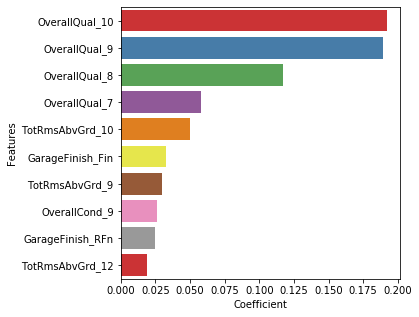

In [161]:
# bar plot to determine the variables that would affect pricing most using ridge regression
plt.figure(figsize=(5,5))
sns.barplot(y = 'Features', x='Coefficient', palette='Set1', data = lasso_df)

The features like OverallQual,TotRmsAbvGrd,GarageFinish and MSSubClass will effect price of the properties.

Observations:
    - The alpha values and mean sqaure errors for Ridge and Lasso as below.
    - Ridge:
        - Alpha-->0.8
        - MSE  -->0.0040408121418780075
    - Lasso:
        - Alpha-->0.0002
        - MSE  -->0.0040407872733254635
The MSE values for both model almost similar there very slight difference, Its best to choose Lasso because it will do feature elimination too.